In [ ]:
import os
import json
import pandas as pd
from tqdm import tqdm

# 기본 경로 설정
base_dir = 'TL1'  # 'TL1' 폴더 경로

# 결과를 저장할 빈 리스트
data = []

# TL 폴더 내의 모든 카테고리 폴더 탐색
for field in os.listdir(base_dir):  # 카테고리 폴더 탐색
    field_path = os.path.join(base_dir, field)
    
    if os.path.isdir(field_path):  # 폴더인지 확인
        # 카테고리 폴더 내의 JSON 파일 목록
        json_files = [f for f in os.listdir(field_path) if f.endswith('.json')]
        
        # 해당 카테고리 폴더 내의 JSON 파일 읽기 (tqdm 적용)
        for json_file in tqdm(json_files, desc=f"Processing JSON files in {field}"):
            json_path = os.path.join(field_path, json_file)
            
            with open(json_path, 'r', encoding='utf-8') as f:
                json_data = json.load(f)
                
                # "named_entity" 항목 추출
                for entity in json_data.get('named_entity', []):
                    for title in entity.get('title', []):
                        sentence = title.get('sentence', '')  # 문장 추출

                        # "board", "write_date", "source_site"를 named_entity 내에서 추출
                        board = entity.get('board', '')  # "board"는 entity 내에 존재
                        write_date = entity.get('write_date', '')  # "write_date"는 entity 내에 존재
                        source_site = entity.get('source_site', '')  # "source_site"는 entity 내에 존재

                        # 데이터를 리스트에 저장
                        data.append({
                            'sentence': sentence,
                            'board': board,
                            'write_date': write_date,
                            'source_site': source_site,
                            'field': field  # 상위 폴더 이름을 'field'로 저장
                        })

# 데이터프레임으로 변환
train = pd.DataFrame(data)

In [ ]:
# train 데이터프레임을 news_title_train.csv로 저장
train.to_csv('news_title_train.csv', index=False, encoding='utf-8')

In [ ]:
# 테스트 폴더이름 모르겠음 !!

import os
import json
import pandas as pd
from tqdm import tqdm

# 기본 경로 설정
base_dir = 'VL1'  # 'VL1' 폴더 경로

# 결과를 저장할 빈 리스트
data = []

# TL 폴더 내의 모든 카테고리 폴더 탐색
for field in os.listdir(base_dir):  # 카테고리 폴더 탐색
    field_path = os.path.join(base_dir, field)
    
    if os.path.isdir(field_path):  # 폴더인지 확인
        # 카테고리 폴더 내의 JSON 파일 목록
        json_files = [f for f in os.listdir(field_path) if f.endswith('.json')]
        
        # 해당 카테고리 폴더 내의 JSON 파일 읽기 (tqdm 적용)
        for json_file in tqdm(json_files, desc=f"Processing JSON files in {field}"):
            json_path = os.path.join(field_path, json_file)
            
            with open(json_path, 'r', encoding='utf-8') as f:
                json_data = json.load(f)
                
                # "named_entity" 항목 추출
                for entity in json_data.get('named_entity', []):
                    for title in entity.get('title', []):
                        sentence = title.get('sentence', '')  # 문장 추출

                        # "board", "write_date", "source_site"를 named_entity 내에서 추출
                        board = entity.get('board', '')  # "board"는 entity 내에 존재
                        write_date = entity.get('write_date', '')  # "write_date"는 entity 내에 존재
                        source_site = entity.get('source_site', '')  # "source_site"는 entity 내에 존재

                        # 데이터를 리스트에 저장
                        data.append({
                            'sentence': sentence,
                            'board': board,
                            'write_date': write_date,
                            'source_site': source_site,
                            'field': field  # 상위 폴더 이름을 'field'로 저장
                        })

# 데이터프레임으로 변환
test = pd.DataFrame(data)

In [ ]:
# train 데이터프레임을 news_title_train.csv로 저장
test.to_csv('news_title_test.csv', index=False, encoding='utf-8')

### 직접적 요인 빈도수/기간 추출

In [1]:
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta


In [2]:
law = pd.read_csv('data/law_summary_train.csv', index_col=0)
law

,id,bill_id,title,committee,field,enactment,amendment,proposer,advisor,date,session,paragraph,ext_summary,gen_summary,terminology,disposal
0,1040_7279,PRC_L1C7M0B6E2Y3A0C9V1O8I5A2N4L9A6,각급 법원의 설치와 관할구역에 관한 법률 일부개정법률안(함진규의원 등 10인),법제사법위원회,각급 법원의 설치와 관할구역에 관한 법률,N,N,함진규의원 등 10인,정연호,2020-05-29,20,"○ 시흥시는 2017년 5월 31일 현재 인구 406,321명, 면적 135.06㎢...","시흥시의 법원 접근성을 보면, 시흥시청에서 안산지방법원까지는 약 10.93㎞ 거리로...","시흥시청에서 안산지방법원까지는 약 10.93㎞ 거리로서 자동차로 약 25분 내외, ...","시흥시청, 안산지방법원, 법원",임기만료폐기
1,1039_7478,PRC_W1D8G1X1I0J9Y1H5H2A1B1K4L5P9H9,자본시장과 금융투자업에 관한 법률 일부개정법률안(조경태의원 등 13인),정무위원회,자본시장과 금융투자업에 관한 법률,N,Y,조경태의원 등 13인,조용복,2020-05-29,20,(1) 개정안은 현재 자본시장법에서 제한적으로 허용하고 있는 차입공매도를 전면 금지...,개정안은 현재 자본시장법에서 제한적으로 허용하고 있는 차입공매도를 전면 금지하려는 ...,개정안은 현재 자본시장법에서 제한적으로 허용하고 있는 차입공매도를 전면 금지하려는 ...,"자본시장법, 차입공매도, 외국인투자자, 금융위원회, 재무상황, 호가규제, Up-Ti...",임기만료폐기
2,1039_9088,PRC_E1W6I1X2P0G8S1P3D2W1Y5S7J6K2L0,국회에서의 증언·감정 등에 관한 법률 일부개정법률안(우상호의원 등 11인),국회운영위원회,국회에서의 증언·감정 등에 관한 법률,N,Y,우상호의원 등 11인,한공식,2017-03-02,20,개정안(우상호·김중로·이원욱 의원안)은 불출석 등의 죄의 형량을 현행 3년 이하의 ...,개정안(우상호·김중로·이원욱 의원안)은 불출석 등의 죄의 형량을 현행 3년 이하의 ...,개정안은 불출석 등의 죄의 형량을 현행 3년 이하의 징역 또는 1천만원 이하의 벌금...,"불출석 등의 죄, 벌금형을 삭제, 형량을 상향조정, 국정감·조사, 국회에서의 증언·...",대안반영폐기
3,1040_11918,PRC_K1M2P0C6T1K5D1P7D4N4Q1C9X7Q1W8,독점규제 및 공정거래에 관한 법률 일부개정법률안(김재원의원 등 11인),정무위원회,독점규제 및 공정거래에 관한 법률,N,Y,김재원의원 등 11인,임익상,2016-05-29,19,"우선, 출총제 도입 여부와 관련하여, 시기적으로 제도의 대폭완화(2007년) 및 완...","우선, 출총제 도입 여부와 관련하여, 시기적으로 제도의 대폭완화(2007년) 및 완...","따라서, 법안심사과정에 있어, 출총제를 비롯한 순환출자 금지 및 지주회사 규제 강화...","법안심사과정, 출총제, 순환출자, 지주회사, 국회법 제64조, 공청회, 출자한도",임기만료폐기
4,1040_1628,PRC_B2O0L0D7K0Q2N1V7G4Q7V4L4Q9F0M2,민법 일부개정법률안(남인순의원 등 18인),법제사법위원회,민법,N,Y,남인순의원 등 18인,진선희,2020-09-24,21,가. 소멸시효 제도의 의의 및 미성년자에 대한 특칙\r\n소멸시효는 권리자가 자신의...,소멸시효는 권리자가 자신의 권리를 행사할 수 있음에도 일정 기간 동안 그 권리를 행...,현행 「민법」은 일반적인 불법행위에 기한 손해배상청구권의 소멸시효는 ‘손해 및 가해...,"민법, 성적자기결정권, 손해배상청구권",대안반영폐기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40277,1037_2948,PRC_K1Z9V0M9J0G5P1Q5O5X3T2K2M0V6X1,아동복지법 일부개정법률안(남인순의원 등 10인),보건복지위원회,아동복지법,N,Y,남인순의원 등 10인,이지민,2020-05-29,20,현행법 제29조의3은 아동학대관련범죄로 형 또는 치료감호를 선고하는 경우에는 일정 ...,육아종합지원센터 및 시간제보육서비스지정기관은 아동을 대상으로 보육서비스 등을 제공하...,개정안은 취업제한 아동관련기관에 육아종합지원센터 및 시간제보육서비스지정기관을 추가하...,"취업제한 아동관련기관, 육아종합지원센터, 시간제보육서비스지정기관, 아동학대 관련 범...",임기만료폐기
40278,1039_2599,PRC_H1Z9O1D2O1H6J1B0C0G5D4C1C4J8M5,동물보호법 일부개정법률안(김병욱의원 등 10인),농림축산식품해양수산위원회,동물보호법,N,Y,김병욱의원 등 10인,권영진,2020-05-29,20,개정안은 반려동물 관련 영업자가 준수사항을 위반하는 경우의 제재처분을 현행 영업정지...,개정안은 반려동물 관련 영업자가 준수사항을 위반하는 경우의 제재처분을 현행 영업정지...,개정안은 반려동물 관련 영업자가 준수사항을 위반하는 경우의 제재처분을 현행 영업정지...,"반려동물 관련 영업자, 준수사항, 영업정지, 준수사항 위반, 행정처분, 과태료",임기만료폐기
40279,1039_1075,PRC_P2D2J0U8U2T9X1J3I5F0X2P1E9M6Y2,농촌공간 재구조화 및 재생지원에 관한 법률안(이양수의원 등 18인),농림축산식품해양수산위원회,농촌공간 재구조화 및 재생지원에 관한 법률,N,N,의원,권영진,2023-02-27,21,1. 법제정 필요성\r\n제정안은 농촌의 난개발과 지역소멸 위기에 대응하기 위해 농...,제정안은 농촌의 난개발과 지역소멸 위기에 대응하기 위해 농촌 공간의 특성을 고려한 ...,제정안은 농촌의 난개발과 지역소멸 위기에 대응하기 위해 농촌 공간의 특성을 고려한 ...,"지역소멸 위기, 농촌소멸 문제, 농촌의 난개발, 지역소멸 위기, 농촌 재생, 농촌공...",대안반영폐기
40280,1037_2822,PRC_B2F1I1H0H0A3D2Z2L5U1A1M0Q4K7Q7,국민건강보험법 일부개정법률안(허종식의원 등 12인),보건복지위원회,국민건강보험법,N,Y,의원,홍형선,2022-05-29,21,현행법 제58조는 가입자 또는 피부양자가 제3자의 행위로 인하여 보험급여를 받은 경...,"이에 개정안은 제3자의 행위로 인하여 보험급여가 실시된 경우 가입자 및 피부양자, ...",개정안은 구상권 행사의 실효성을 담보하여 건강보험재정의 누수를 방지할 수 있다는 점...,"구상권 행사, 건강보험재정, 책무적 관점, 배상책임, 통보의무, 손해배상책임자",대안반영폐기


In [3]:
law = law[['id', 'field', 'date', 'terminology', 'disposal']]
law

,id,field,date,terminology,disposal
0,1040_7279,각급 법원의 설치와 관할구역에 관한 법률,2020-05-29,"시흥시청, 안산지방법원, 법원",임기만료폐기
1,1039_7478,자본시장과 금융투자업에 관한 법률,2020-05-29,"자본시장법, 차입공매도, 외국인투자자, 금융위원회, 재무상황, 호가규제, Up-Ti...",임기만료폐기
2,1039_9088,국회에서의 증언·감정 등에 관한 법률,2017-03-02,"불출석 등의 죄, 벌금형을 삭제, 형량을 상향조정, 국정감·조사, 국회에서의 증언·...",대안반영폐기
3,1040_11918,독점규제 및 공정거래에 관한 법률,2016-05-29,"법안심사과정, 출총제, 순환출자, 지주회사, 국회법 제64조, 공청회, 출자한도",임기만료폐기
4,1040_1628,민법,2020-09-24,"민법, 성적자기결정권, 손해배상청구권",대안반영폐기
...,...,...,...,...,...
40277,1037_2948,아동복지법,2020-05-29,"취업제한 아동관련기관, 육아종합지원센터, 시간제보육서비스지정기관, 아동학대 관련 범...",임기만료폐기
40278,1039_2599,동물보호법,2020-05-29,"반려동물 관련 영업자, 준수사항, 영업정지, 준수사항 위반, 행정처분, 과태료",임기만료폐기
40279,1039_1075,농촌공간 재구조화 및 재생지원에 관한 법률,2023-02-27,"지역소멸 위기, 농촌소멸 문제, 농촌의 난개발, 지역소멸 위기, 농촌 재생, 농촌공...",대안반영폐기
40280,1037_2822,국민건강보험법,2022-05-29,"구상권 행사, 건강보험재정, 책무적 관점, 배상책임, 통보의무, 손해배상책임자",대안반영폐기


In [4]:
news = pd.read_csv('data/news_title_cleaned_train.csv')
news

,sentence,board,write_date,source_site,field
0,트럼프 '5월 예루살렘 美대사관 개소 때 직접 방문 가능',기타_기타,2018-03-06,뉴시스,취미
1,"틸러슨, 6일부터 아프리카 순방…트럼프 '거지소굴' 발언 뒷처리",기타_기타,2018-03-06,뉴시스,취미
2,사우디 정부 '이혼한 여성에게 자녀 친권 우선권 부여',기타_기타,2018-03-13,뉴시스,취미
3,"'eu, 브렉시트 후에도 英에 ecj 관할권 수용 요구할 듯' ft",기타_기타,2018-02-27,뉴시스,취미
4,"트럼프 '美 국무부 인력난, 민주당 인준 방해 탓'",기타_기타,2018-03-12,뉴시스,취미
...,...,...,...,...,...
4923928,경기 북부 호우특보에 '호우주의'도…서울 시간당 80㎜ 큰비,사회_날씨/재해,2020-08-01,뉴스1,사건사고
4923929,[퇴근길 날씨] 한증막 열기에 오늘 밤도 열대야…전주·홍성 호우주의보,사회_날씨/재해,2020-08-31,뉴스1,사건사고
4923930,[내일 날씨] 중부지방 최대 500㎜ '폭우'…남부도 100㎜(종합),사회_날씨/재해,2020-08-08,뉴스1,사건사고
4923931,[오늘 날씨] 태풍 '바비' 가지만 낮까지 강풍…남부 33도 더위,사회_날씨/재해,2020-08-27,뉴스1,사건사고


### 빈도 확률 계산

In [5]:
# 날짜 형식 변환
news['write_date'] = pd.to_datetime(news['write_date'])
law['date'] = pd.to_datetime(law['date'])

# tqdm을 통해 빈도 계산 작업 모니터링
def calculate_keyword_frequency(terminology, filtered_news):
    keywords = terminology.split(', ')
    keyword_count = 0
    
    for sentence in filtered_news['sentence']:
        for keyword in keywords:
            if keyword in sentence:
                keyword_count += 1
                
    return keyword_count

# 빈도 확률 계산
law['frequency_probability'] = 0.0

for idx, row in tqdm(law.iterrows(), total=law.shape[0], desc="Processing law keywords"):
    # 각 법률안의 date에서 1년 전까지의 뉴스만 필터링
    start_date = row['date'] - timedelta(days=365)
    end_date = row['date']
    
    # 해당 기간의 뉴스 데이터 필터링
    filtered_news = news[(news['write_date'] >= start_date) & (news['write_date'] <= end_date)]
    
    # 해당 기간의 뉴스 개수
    total_news_count = len(filtered_news)
    
    # terminology에 포함된 키워드 빈도 계산
    keyword_count = calculate_keyword_frequency(row['terminology'], filtered_news)
    
    # 빈도 확률 계산
    if total_news_count > 0:
        law.at[idx, 'frequency_probability'] = keyword_count / total_news_count
    else:
        law.at[idx, 'frequency_probability'] = 0

# 총 6시간

/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_7512/2573110361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  law['date'] = pd.to_datetime(law['date'])
/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_7512/2573110361.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  law['frequency_probability'] = 0.0
Processing law keywords: 100%|██████████| 40282/40282 [3:27:43<00:00,  3.23it/s]


In [6]:
law.to_csv('data/law_with_direct_freq.csv', index=False)

In [9]:
law

,id,field,date,terminology,disposal,frequency_probability,median_date_difference
0,1040_7279,각급 법원의 설치와 관할구역에 관한 법률,2020-05-29,"시흥시청, 안산지방법원, 법원",임기만료폐기,0.003552,185.5
1,1039_7478,자본시장과 금융투자업에 관한 법률,2020-05-29,"자본시장법, 차입공매도, 외국인투자자, 금융위원회, 재무상황, 호가규제, Up-Ti...",임기만료폐기,0.002550,190.0
2,1039_9088,국회에서의 증언·감정 등에 관한 법률,2017-03-02,"불출석 등의 죄, 벌금형을 삭제, 형량을 상향조정, 국정감·조사, 국회에서의 증언·...",대안반영폐기,0.000000,None
3,1040_11918,독점규제 및 공정거래에 관한 법률,2016-05-29,"법안심사과정, 출총제, 순환출자, 지주회사, 국회법 제64조, 공청회, 출자한도",임기만료폐기,0.000623,199.0
4,1040_1628,민법,2020-09-24,"민법, 성적자기결정권, 손해배상청구권",대안반영폐기,0.000060,210.5
...,...,...,...,...,...,...,...
40277,1037_2948,아동복지법,2020-05-29,"취업제한 아동관련기관, 육아종합지원센터, 시간제보육서비스지정기관, 아동학대 관련 범...",임기만료폐기,0.000193,None
40278,1039_2599,동물보호법,2020-05-29,"반려동물 관련 영업자, 준수사항, 영업정지, 준수사항 위반, 행정처분, 과태료",임기만료폐기,0.000716,None
40279,1039_1075,농촌공간 재구조화 및 재생지원에 관한 법률,2023-02-27,"지역소멸 위기, 농촌소멸 문제, 농촌의 난개발, 지역소멸 위기, 농촌 재생, 농촌공...",대안반영폐기,0.000000,None
40280,1037_2822,국민건강보험법,2022-05-29,"구상권 행사, 건강보험재정, 책무적 관점, 배상책임, 통보의무, 손해배상책임자",대안반영폐기,0.000125,None


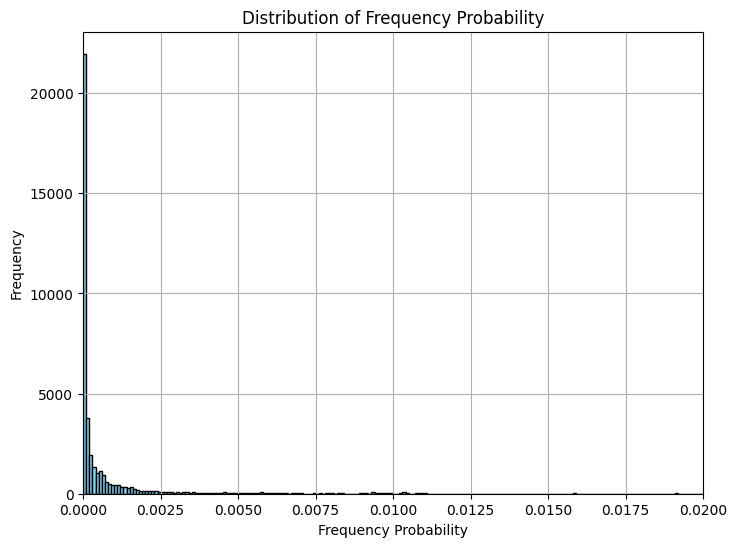

In [17]:
import matplotlib.pyplot as plt

# 히스토그램을 그리기 위한 데이터
frequency_data = law['frequency_probability']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(frequency_data, bins=10000, color='skyblue', edgecolor='black')
plt.title('Distribution of Frequency Probability')
plt.xlabel('Frequency Probability')
plt.ylabel('Frequency')
plt.xlim(0, 0.02)  # x축 범위를 0 ~ 0.03로 제한
plt.grid(True)

# 히스토그램 표시
plt.show()


#### 1년치 데이터 슬라이싱

In [10]:
# 뉴스 데이터: 2014-01-12부터 1년
news_start_date = pd.to_datetime('2014-01-12')
news_end_date = news_start_date + timedelta(days=365)
filtered_news = news[(news['write_date'] >= news_start_date) & (news['write_date'] <= news_end_date)]

# 법률 데이터: 2015-01-12부터 1년
law_start_date = pd.to_datetime('2015-01-12')
law_end_date = law_start_date + timedelta(days=365)
filtered_law = law[(law['date'] >= law_start_date) & (law['date'] <= law_end_date)]

# tqdm을 통해 빈도 계산 작업 모니터링
def calculate_keyword_frequency(terminology, filtered_news):
    keywords = terminology.split(', ')
    keyword_count = 0
    
    for sentence in filtered_news['sentence']:
        for keyword in keywords:
            if keyword in sentence:
                keyword_count += 1
                
    return keyword_count

# 빈도 확률 계산
filtered_law['frequency_probability'] = 0.0

for idx, row in tqdm(filtered_law.iterrows(), total=filtered_law.shape[0], desc="Processing law keywords"):
    # 각 법률안의 date에서 1년 전까지의 뉴스만 필터링
    start_date = row['date'] - timedelta(days=365)
    end_date = row['date']
    
    # 해당 기간의 뉴스 데이터 필터링
    recent_news = filtered_news[(filtered_news['write_date'] >= start_date) & (filtered_news['write_date'] <= end_date)]
    
    # 해당 기간의 뉴스 개수
    total_news_count = len(recent_news)
    
    # terminology에 포함된 키워드 빈도 계산
    keyword_count = calculate_keyword_frequency(row['terminology'], recent_news)
    
    # 빈도 확률 계산
    if total_news_count > 0:
        filtered_law.at[idx, 'frequency_probability'] = keyword_count / total_news_count
    else:
        filtered_law.at[idx, 'frequency_probability'] = 0


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_5732/1778996382.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_law['frequency_probability'] = 0.0
Processing law keywords: 100%|████████████████| 268/268 [00:20<00:00, 13.29it/s]


In [11]:
filtered_law

,id,field,date,terminology,disposal,frequency_probability
0,1040_7279,각급 법원의 설치와 관할구역에 관한 법률,2020-05-29,"시흥시청, 안산지방법원, 법원",임기만료폐기,0.003552
1,1039_7478,자본시장과 금융투자업에 관한 법률,2020-05-29,"자본시장법, 차입공매도, 외국인투자자, 금융위원회, 재무상황, 호가규제, Up-Ti...",임기만료폐기,0.002550
2,1039_9088,국회에서의 증언·감정 등에 관한 법률,2017-03-02,"불출석 등의 죄, 벌금형을 삭제, 형량을 상향조정, 국정감·조사, 국회에서의 증언·...",대안반영폐기,0.000000
3,1040_11918,독점규제 및 공정거래에 관한 법률,2016-05-29,"법안심사과정, 출총제, 순환출자, 지주회사, 국회법 제64조, 공청회, 출자한도",임기만료폐기,0.000623
4,1040_1628,민법,2020-09-24,"민법, 성적자기결정권, 손해배상청구권",대안반영폐기,0.000060
...,...,...,...,...,...,...
40277,1037_2948,아동복지법,2020-05-29,"취업제한 아동관련기관, 육아종합지원센터, 시간제보육서비스지정기관, 아동학대 관련 범...",임기만료폐기,0.000000
40278,1039_2599,동물보호법,2020-05-29,"반려동물 관련 영업자, 준수사항, 영업정지, 준수사항 위반, 행정처분, 과태료",임기만료폐기,0.000000
40279,1039_1075,농촌공간 재구조화 및 재생지원에 관한 법률,2023-02-27,"지역소멸 위기, 농촌소멸 문제, 농촌의 난개발, 지역소멸 위기, 농촌 재생, 농촌공...",대안반영폐기,0.000000
40280,1037_2822,국민건강보험법,2022-05-29,"구상권 행사, 건강보험재정, 책무적 관점, 배상책임, 통보의무, 손해배상책임자",대안반영폐기,0.000000


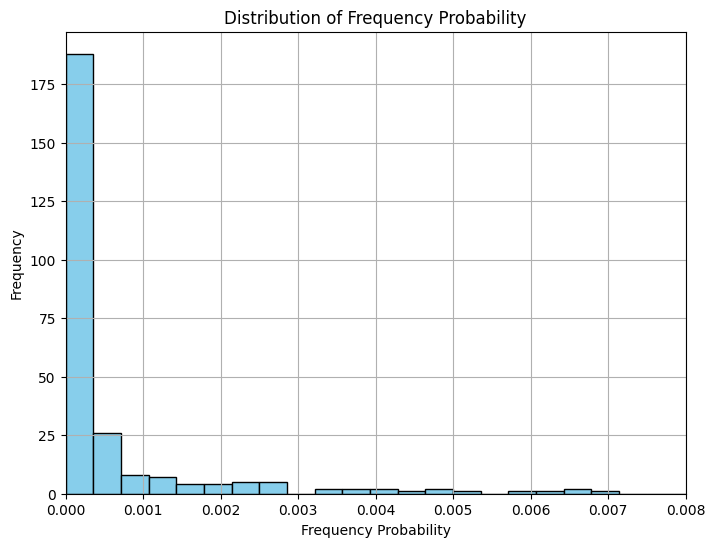

In [21]:
import matplotlib.pyplot as plt

# 히스토그램을 그리기 위한 데이터
frequency_data = filtered_law['frequency_probability']

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(frequency_data, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Frequency Probability')
plt.xlabel('Frequency Probability')
plt.ylabel('Frequency')
plt.xlim(0, 0.008)  # x축 범위를 0 ~ 0.001로 제한
plt.grid(True)

# 히스토그램 표시
plt.show()


### 최근 날짜 차이(전체)

In [7]:
# 날짜 형식 변환
# news['write_date'] = pd.to_datetime(news['write_date'])
# law['date'] = pd.to_datetime(law['date'])

# 뉴스 데이터를 날짜순으로 정렬 (여기에 tqdm 사용하지 않음)
news = news.sort_values(by='write_date')

In [8]:
import pandas as pd
from tqdm import tqdm
from datetime import timedelta
import bisect
import numpy as np

# 실시간으로 중앙값을 구하는 함수
def calculate_median_gap(terminology, law_date, news_df):
    keywords = terminology.split(', ')
    if not keywords:
        return None

    # 날짜 차이를 저장할 리스트
    date_differences = []

    # 이미 처리된 날짜는 건너뛰도록 관리
    processed_dates = set()

    # 날짜 순으로 정렬된 뉴스 데이터에서 키워드를 찾는 과정
    for idx, row in news_df.iterrows():
        news_date = row['write_date']

        # 뉴스 날짜가 처리된 적이 있다면 건너뜀
        if news_date in processed_dates:
            continue

        # 해당 뉴스 문장에서 키워드가 포함되는지 확인
        for keyword in keywords:
            if keyword in row['sentence']:
                # 날짜 차이를 계산하고 리스트에 추가
                date_diff = (law_date - news_date).days
                if 0 < date_diff <= 365:  # 1년 이내만 고려
                    date_differences.append(date_diff)
                
                # 해당 날짜는 처리된 것으로 기록
                processed_dates.add(news_date)
                # 그 날짜에 대한 다른 뉴스는 무시하고 다음 날짜로 넘어감
                break

    # 리스트가 비어있으면 None을 반환
    if not date_differences:
        return None

    # 중앙값 계산
    return np.median(date_differences)

# 법률안에 대해 날짜 차이 중앙값 계산
law['median_date_difference'] = None

for idx, row in tqdm(law.iterrows(), total=law.shape[0], desc="Processing law keywords"):
    # 각 법률안의 날짜에서 1년 전까지의 뉴스만 필터링
    start_date = row['date'] - timedelta(days=365)
    end_date = row['date']
    
    # 해당 기간의 뉴스 데이터 필터링
    filtered_news = news[(news['write_date'] >= start_date) & (news['write_date'] <= end_date)]
    
    # 키워드와 뉴스 날짜 차이 중앙값을 계산
    median_diff = calculate_median_gap(row['terminology'], row['date'], filtered_news)
    
    # 결과 저장
    law.at[idx, 'median_date_difference'] = median_diff

# 결과 확인
# print(law[['id', 'terminology', 'median_date_difference']])


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_7512/3116130619.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  law['median_date_difference'] = None
Processing law keywords:   1%|        | 402/40282 [2:23:25<237:08:18, 21.41s/it]


KeyboardInterrupt: 

In [ ]:
law.to_csv('data/law_with_direct_recent.csv', index=False)

### 최근 날짜 차이(우선 1년치만)

In [18]:
# 뉴스 데이터: 2014-01-12부터 1년
news_start_date = pd.to_datetime('2014-01-12')
news_end_date = news_start_date + timedelta(days=365)
filtered_news = news[(news['write_date'] >= news_start_date) & (news['write_date'] <= news_end_date)]

# 법률 데이터: 2015-01-12부터 1년
law_start_date = pd.to_datetime('2015-01-12')
law_end_date = law_start_date + timedelta(days=365)
filtered_law = law[(law['date'] >= law_start_date) & (law['date'] <= law_end_date)]

# 키워드가 등장한 뉴스와 법률안 날짜 간의 차이를 계산하는 함수
def calculate_date_differences(terminology, law_date, news_df):
    keywords = terminology.split(', ')
    if not keywords:
        return None

    # 날짜 간격을 저장할 리스트
    date_differences = []

    # 키워드에 대한 각 뉴스에서의 날짜 간격을 계산
    for keyword in keywords:
        keyword = keyword.strip()  # 키워드 앞뒤 공백 제거
        if keyword:
            # 해당 키워드가 포함된 뉴스 기사 추출
            matching_news = news_df[news_df['sentence'].str.contains(keyword, na=False)]

            # 뉴스 기사별로 날짜 간격 계산
            for news_date in matching_news['write_date']:
                date_diff = (law_date - news_date).days  # 날짜 간격을 일 단위로 계산
                if 0 < date_diff < 365:  # 1년 이내 뉴스만 포함
                    date_differences.append(date_diff)

    return date_differences

# 각 법률안의 키워드가 뉴스에서 얼마나 최근에 나왔는지 계산
filtered_law['date_differences'] = filtered_law.apply(
    lambda row: calculate_date_differences(row['terminology'], row['date'], filtered_news), axis=1
)


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_7512/653837745.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_law['date_differences'] = filtered_law.apply(


In [19]:
filtered_law

,id,field,date,terminology,disposal,frequency_probability,median_date_difference,date_differences
549,1037_5327,농어촌특별세법,2015-12-02,"조세특례제한법, 재형저축, 장기집합투자증권저축, 배당, 농어촌특별세, 자산종합관리계...",대안반영폐기,0.002768,None,"[364, 364, 364, 364, 364, 363, 363, 363, 363, ..."
666,1040_9282,국가인권위원회법,2016-01-08,"국가재정법, 국가인권위원회법",대안반영폐기,0.000008,None,[]
831,1037_5522,조달사업에 관한 법률,2015-12-31,"안전관리물자, 조달청장, 안전이슈, 국회법, 국회 소관 상임위원회, 개정사항",대안반영폐기,0.001062,None,[353]
1051,1040_10145,국가인권위원회법,2016-01-08,"국가인권위원회, 인사청문",대안반영폐기,0.000606,None,[361]
1392,1037_5303,통계법,2015-12-31,"통계 공표, 통계의 변경, 공표 예정 일시 조정, 통계종사자, 통계의 독립성을, 통...",대안반영폐기,0.000464,None,"[357, 355]"
...,...,...,...,...,...,...,...,...
39571,1037_5472,가축전염병 예방법,2015-05-29,"평가기준, 농식품부, 검토 과정, 우수 지자체, 행정기관",대안반영폐기,0.000275,None,"[336, 290, 269, 338, 338, 325, 325, 319, 318, ..."
39642,1040_13534,검역법,2016-01-08,"보건복지부장관, 검역감염병",대안반영폐기,0.000041,None,[]
39661,1037_5323,환경보건법,2015-12-31,"환경부, 생태계, 가외성, 환경보건법, 물질의 적용, 사용 제한, 규제",대안반영폐기,0.002783,None,"[359, 353, 364, 358, 364, 364, 364, 363, 363, ..."
39750,1037_5541,산업안전보건법,2015-12-31,"피한정후견인, 업무수행, 업무성격, 산업안전지도사, 산업보건지도사, 경과조치 조항",대안반영폐기,0.000008,None,[]


In [20]:
import numpy as np
import statistics

# mode 계산 중 빈 리스트는 NaN으로 처리
filtered_law['date_diff_mod'] = filtered_law['date_differences'].apply(
    lambda x: np.nan if not x else statistics.mode(x)
)

filtered_law

/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_7512/322965252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_law['date_diff_mod'] = filtered_law['date_differences'].apply(


,id,field,date,terminology,disposal,frequency_probability,median_date_difference,date_differences,date_diff_mod
549,1037_5327,농어촌특별세법,2015-12-02,"조세특례제한법, 재형저축, 장기집합투자증권저축, 배당, 농어촌특별세, 자산종합관리계...",대안반영폐기,0.002768,None,"[364, 364, 364, 364, 364, 363, 363, 363, 363, ...",348.0
666,1040_9282,국가인권위원회법,2016-01-08,"국가재정법, 국가인권위원회법",대안반영폐기,0.000008,None,[],NaN
831,1037_5522,조달사업에 관한 법률,2015-12-31,"안전관리물자, 조달청장, 안전이슈, 국회법, 국회 소관 상임위원회, 개정사항",대안반영폐기,0.001062,None,[353],353.0
1051,1040_10145,국가인권위원회법,2016-01-08,"국가인권위원회, 인사청문",대안반영폐기,0.000606,None,[361],361.0
1392,1037_5303,통계법,2015-12-31,"통계 공표, 통계의 변경, 공표 예정 일시 조정, 통계종사자, 통계의 독립성을, 통...",대안반영폐기,0.000464,None,"[357, 355]",357.0
...,...,...,...,...,...,...,...,...,...
39571,1037_5472,가축전염병 예방법,2015-05-29,"평가기준, 농식품부, 검토 과정, 우수 지자체, 행정기관",대안반영폐기,0.000275,None,"[336, 290, 269, 338, 338, 325, 325, 319, 318, ...",234.0
39642,1040_13534,검역법,2016-01-08,"보건복지부장관, 검역감염병",대안반영폐기,0.000041,None,[],NaN
39661,1037_5323,환경보건법,2015-12-31,"환경부, 생태계, 가외성, 환경보건법, 물질의 적용, 사용 제한, 규제",대안반영폐기,0.002783,None,"[359, 353, 364, 358, 364, 364, 364, 363, 363, ...",353.0
39750,1037_5541,산업안전보건법,2015-12-31,"피한정후견인, 업무수행, 업무성격, 산업안전지도사, 산업보건지도사, 경과조치 조항",대안반영폐기,0.000008,None,[],NaN


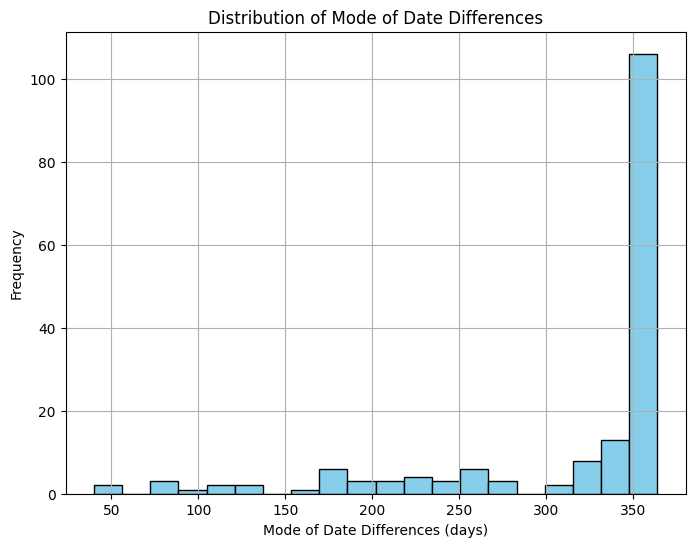

In [21]:
# NaN 값을 제외한 'date_diff_mod' 데이터
filtered_data_mode = filtered_law['date_diff_mod'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.hist(filtered_data_mode, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Mode of Date Differences')
plt.xlabel('Mode of Date Differences (days)')
plt.ylabel('Frequency')
plt.grid(True)

# 히스토그램 표시
plt.show()